In [1]:
import sys, os, glob
root_dir = '/home/gddaslab/mxp140/tcr_project_ultimate'
sys.path.append(root_dir)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pdf import pdf as pdf
import matplotlib.pyplot as plt

In [18]:
print(max_kr_panpep, max_kr_vdjdb, max_kr_mcpas)

223.63591068 172.76630708749872 211.1436385456473


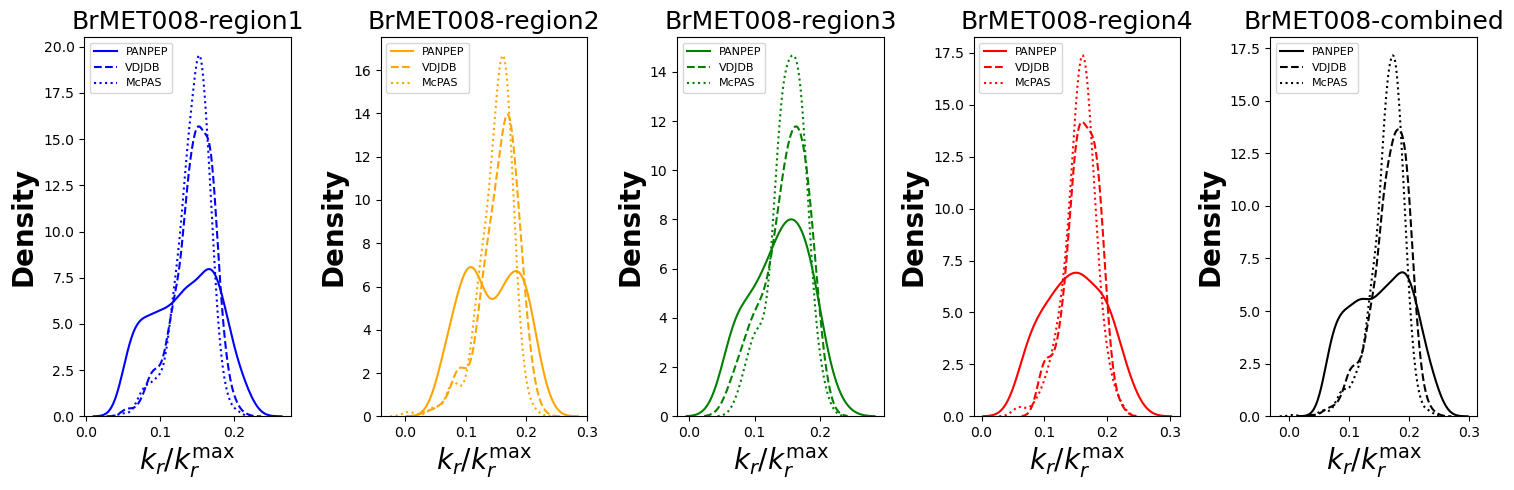

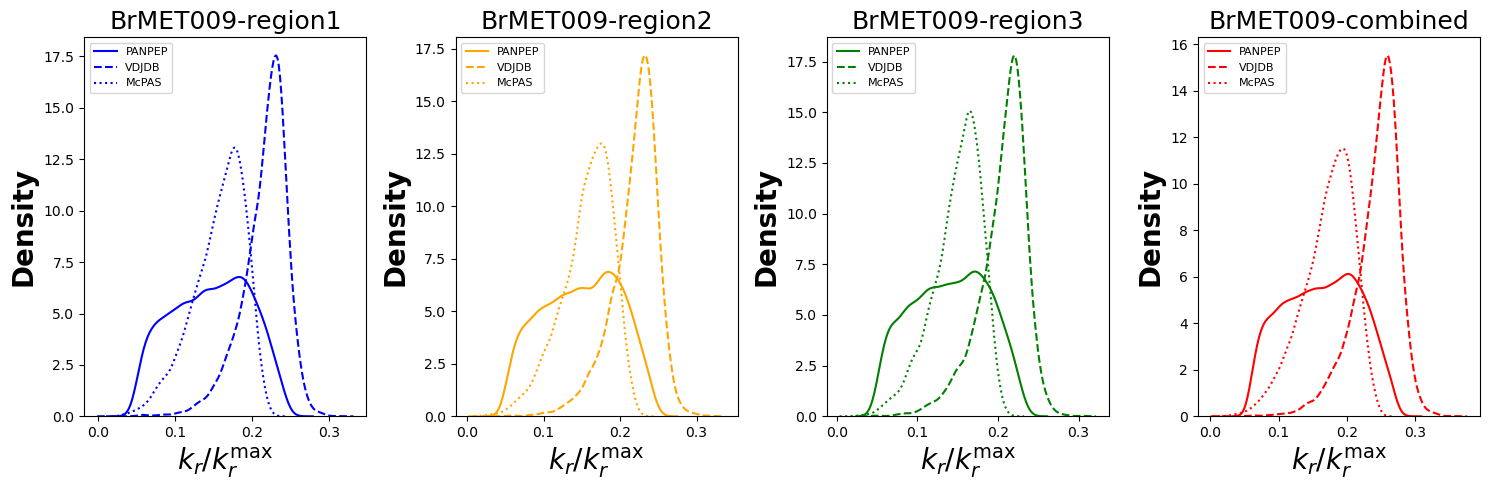

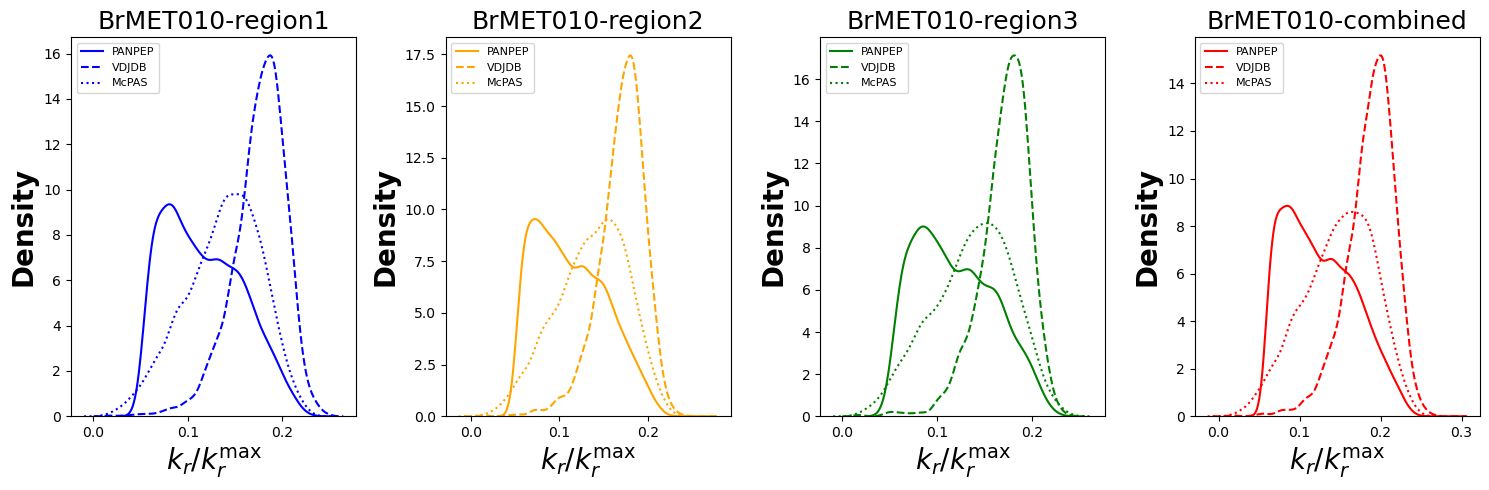

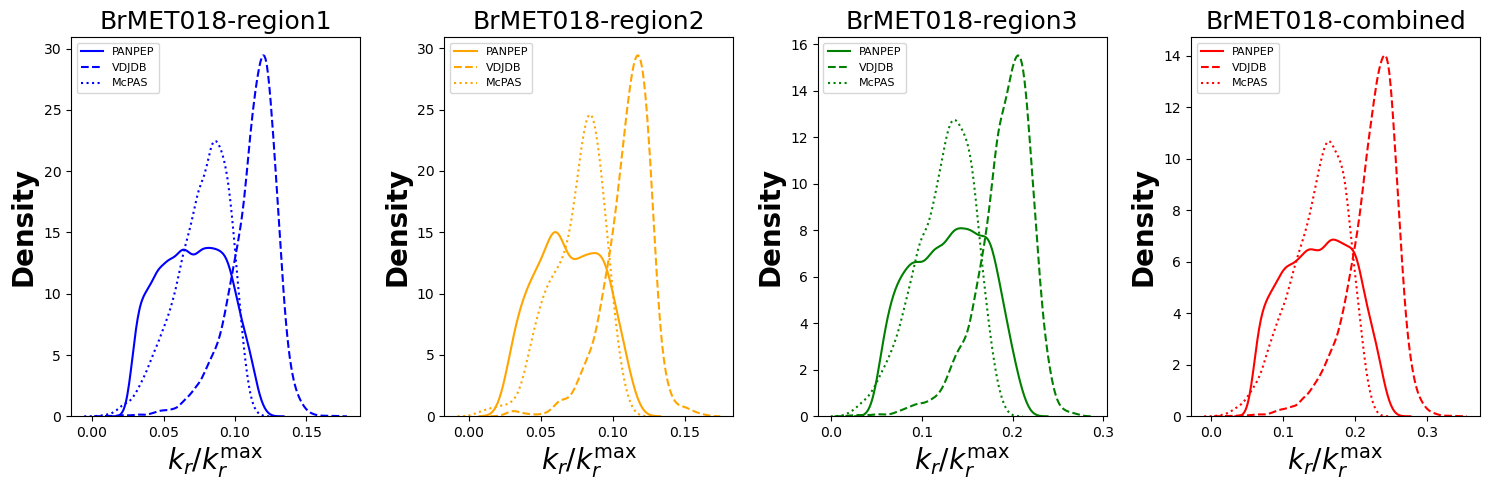

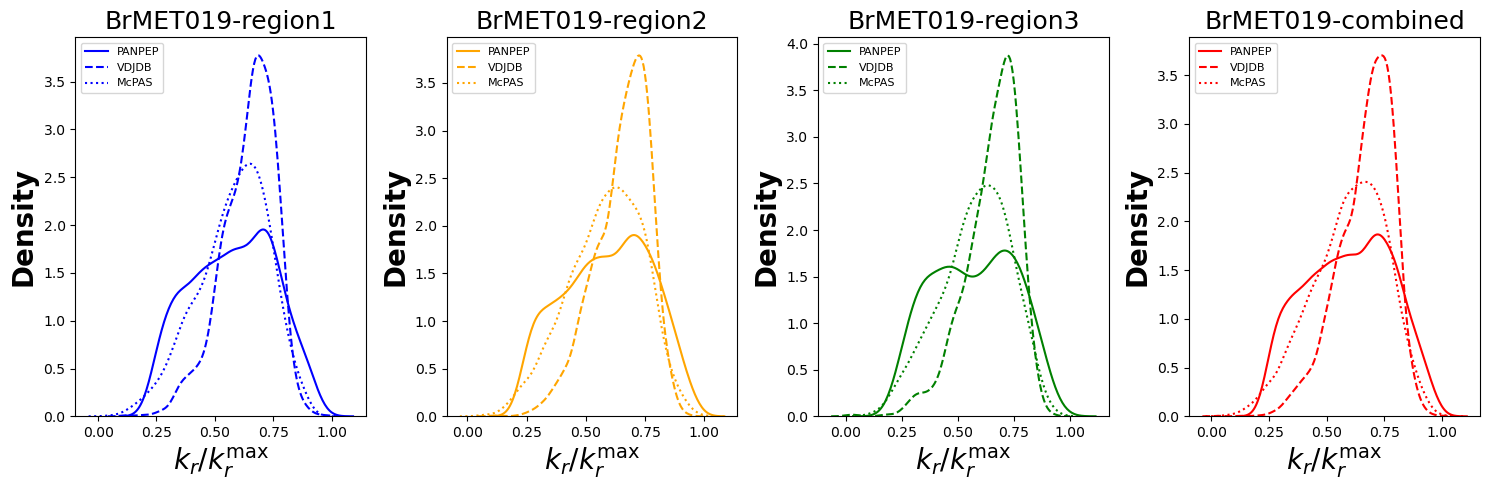

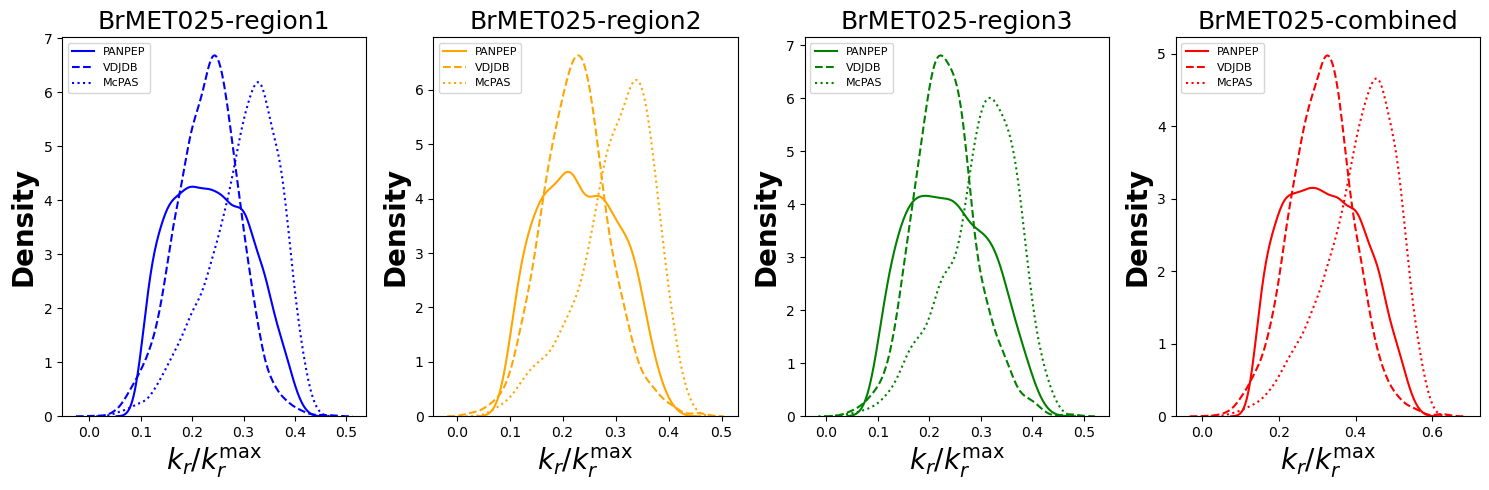

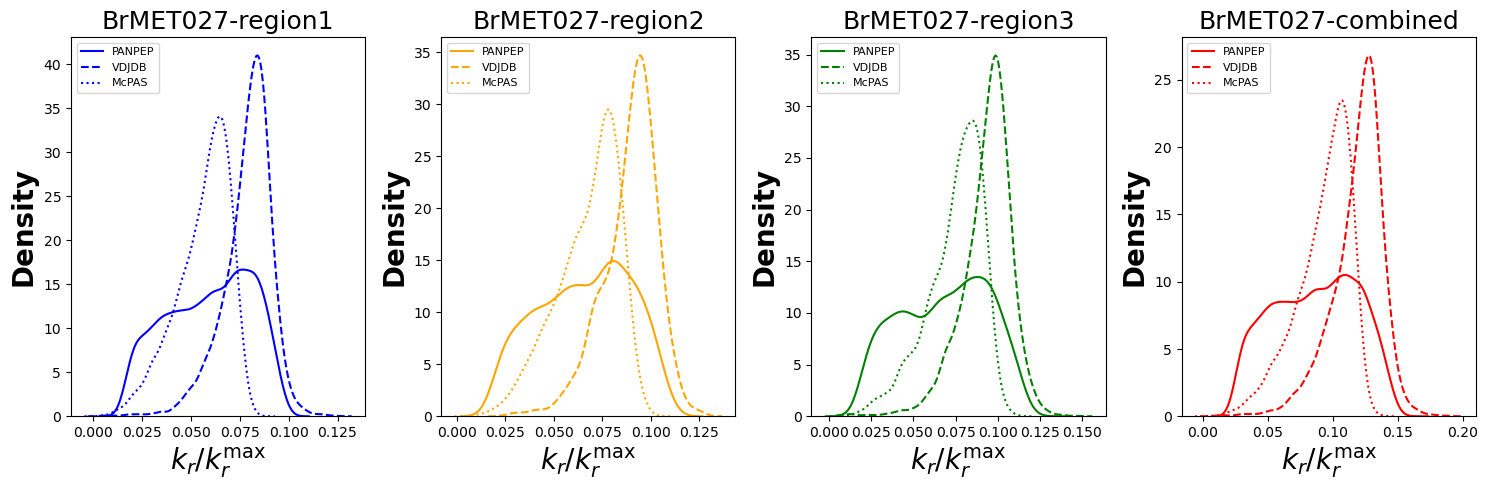

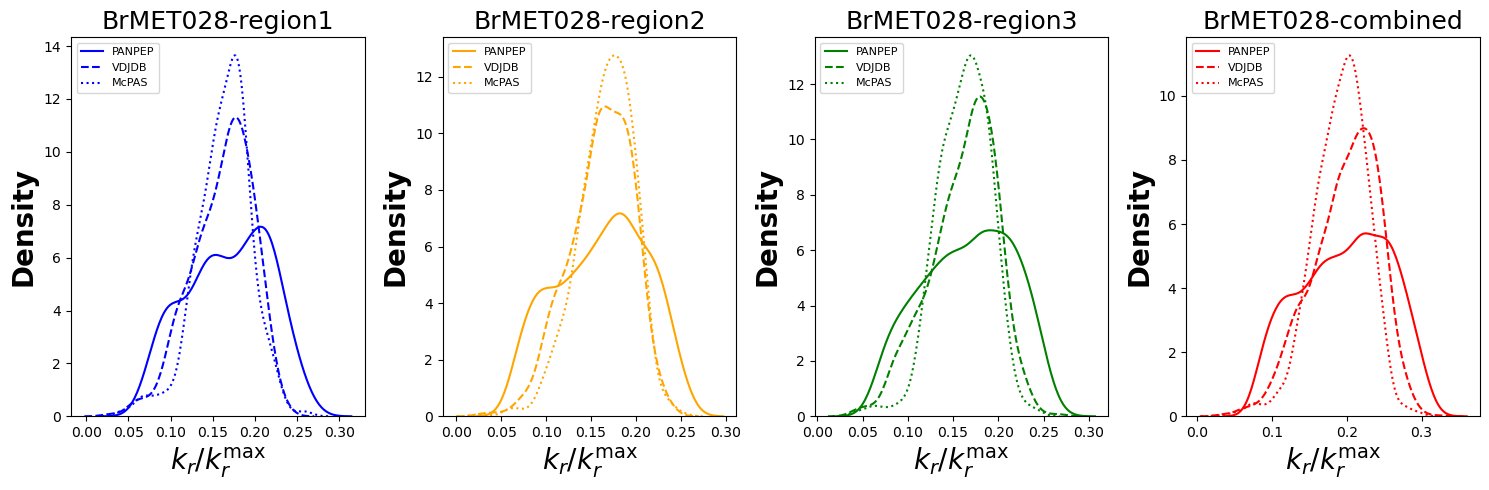

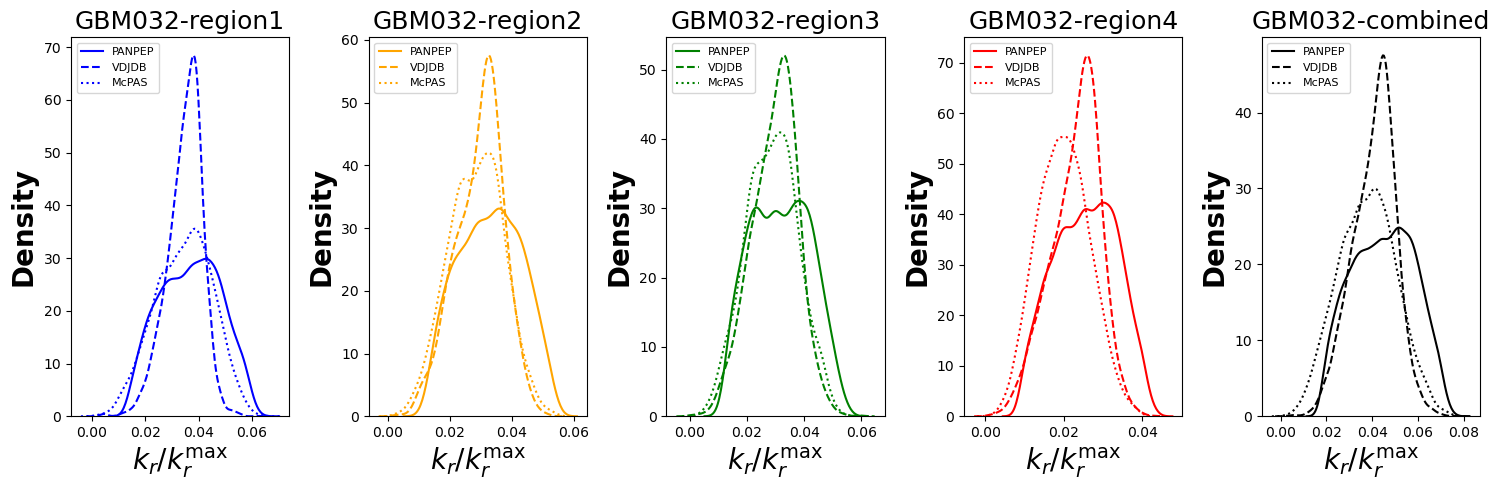

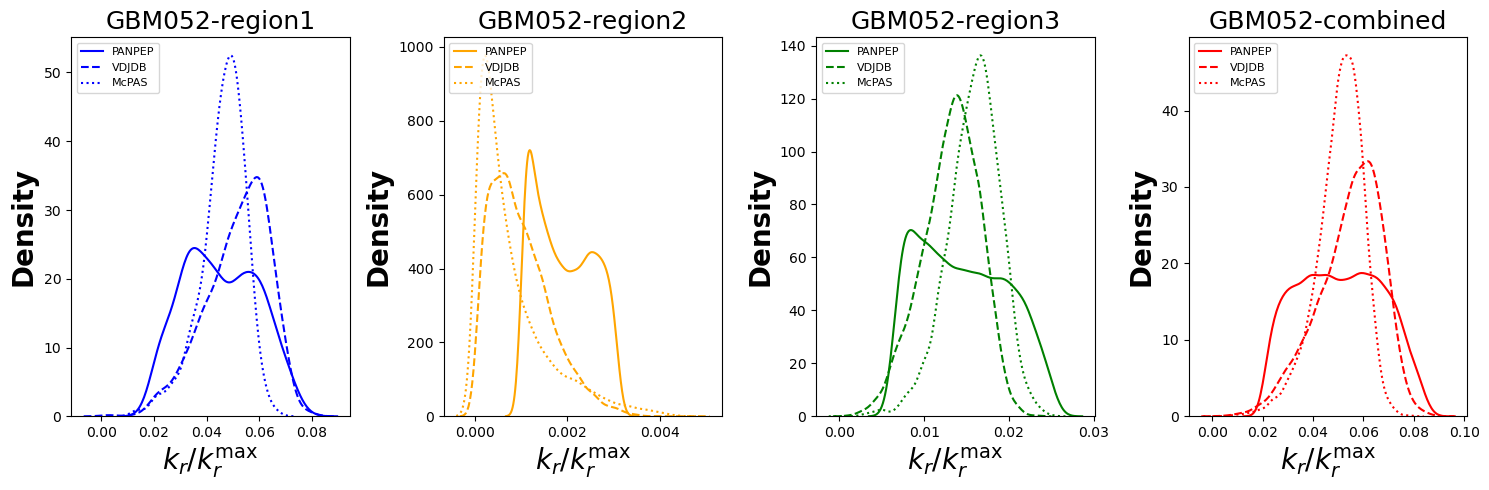

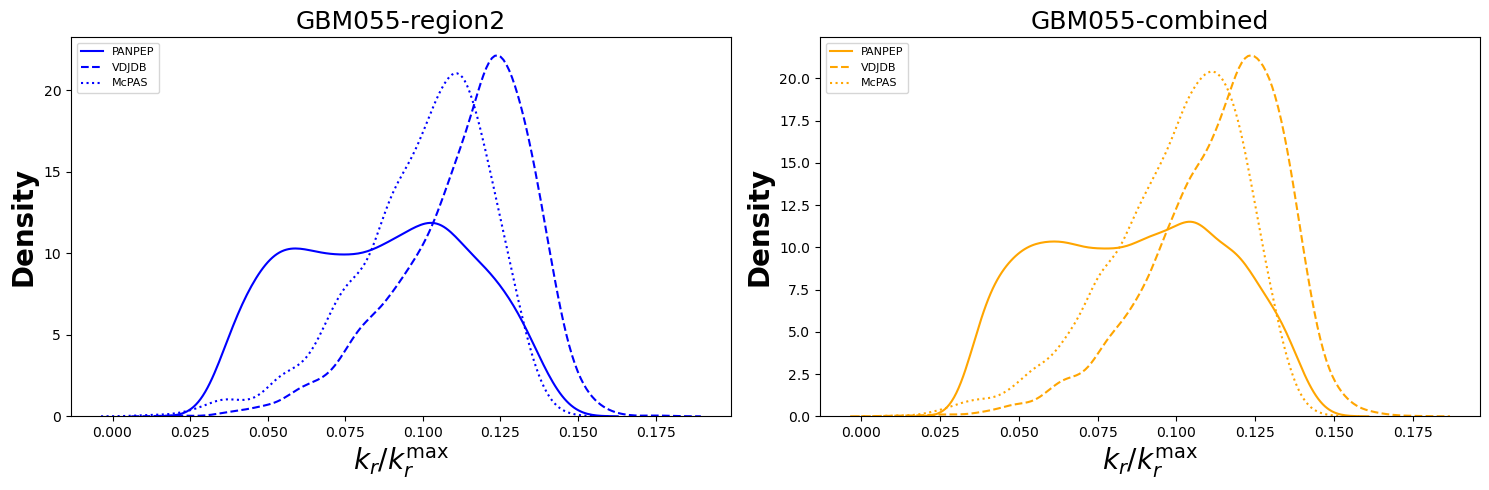

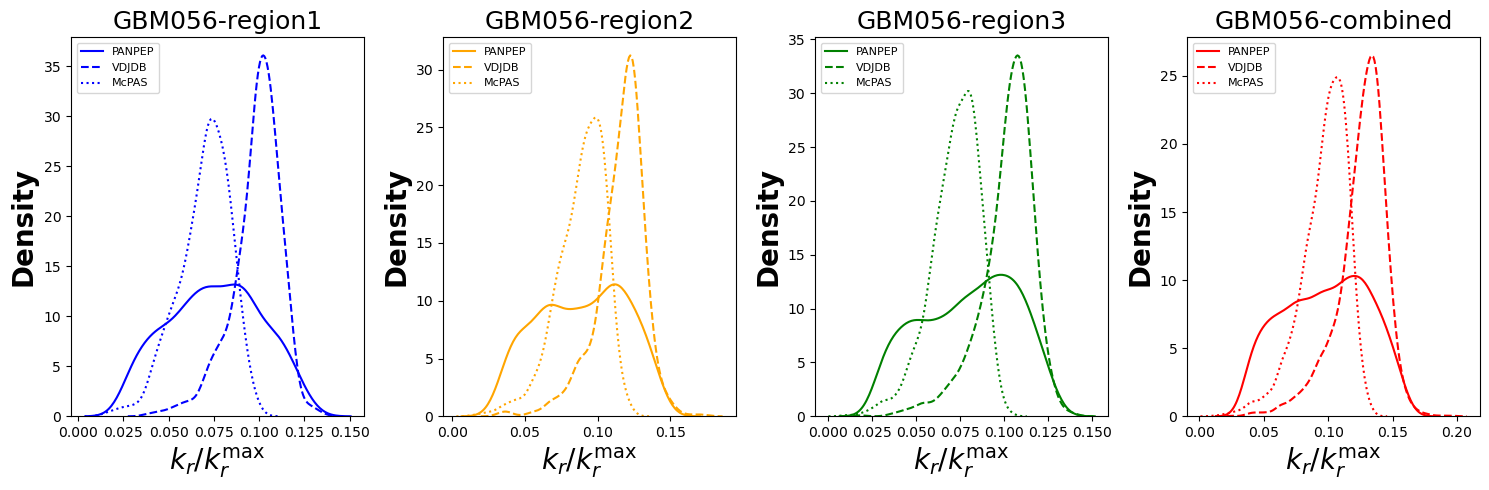

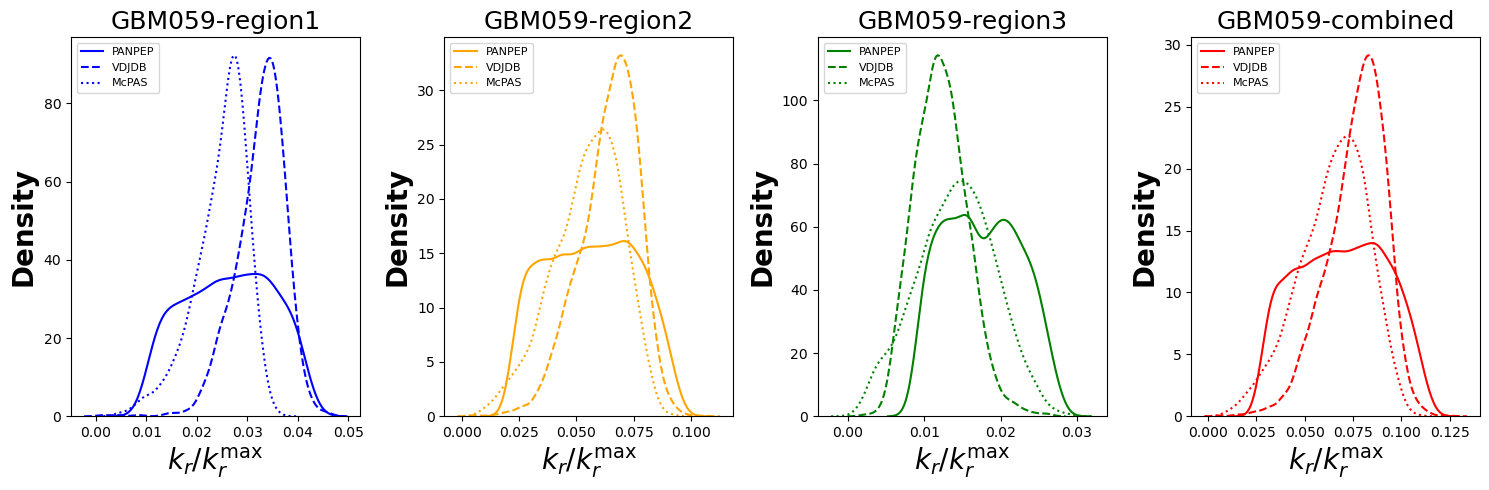

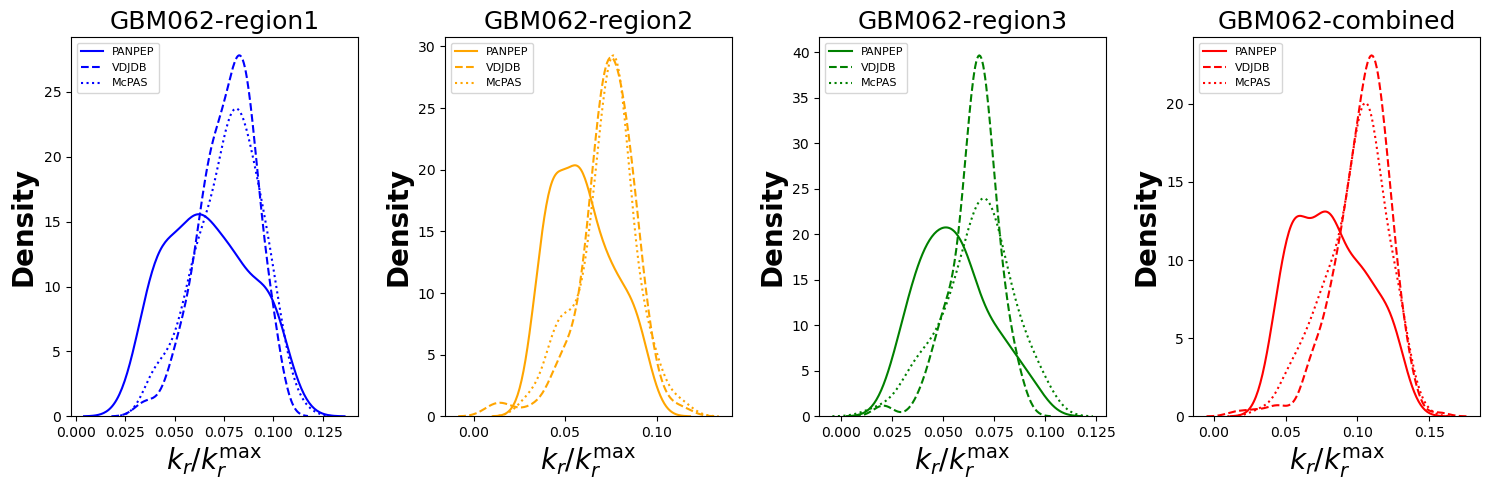

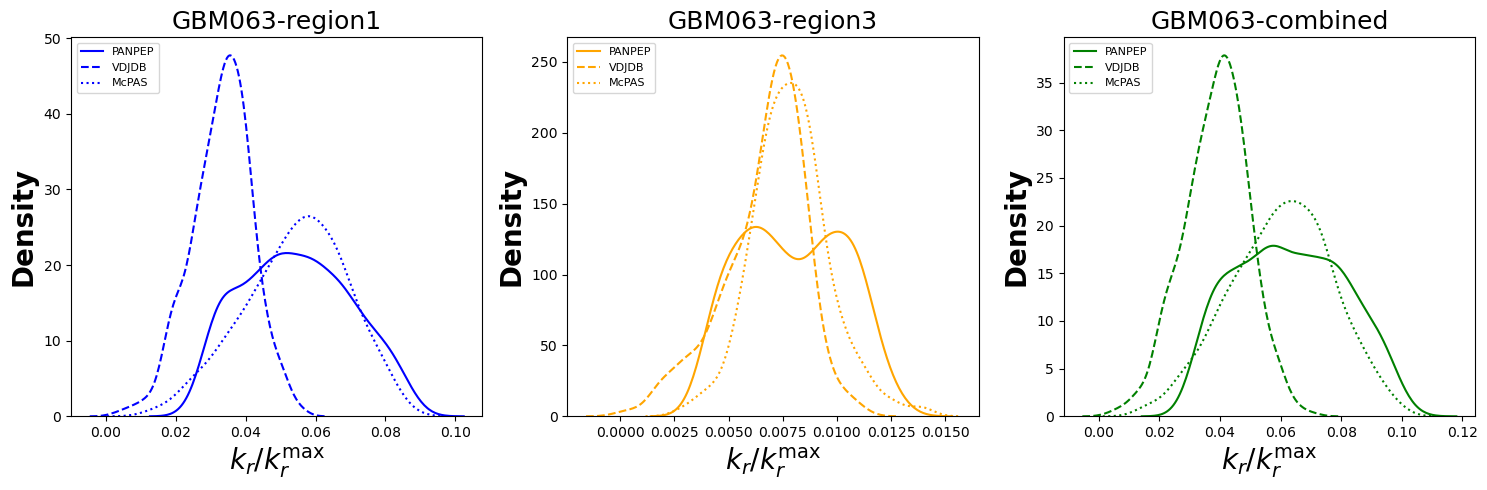

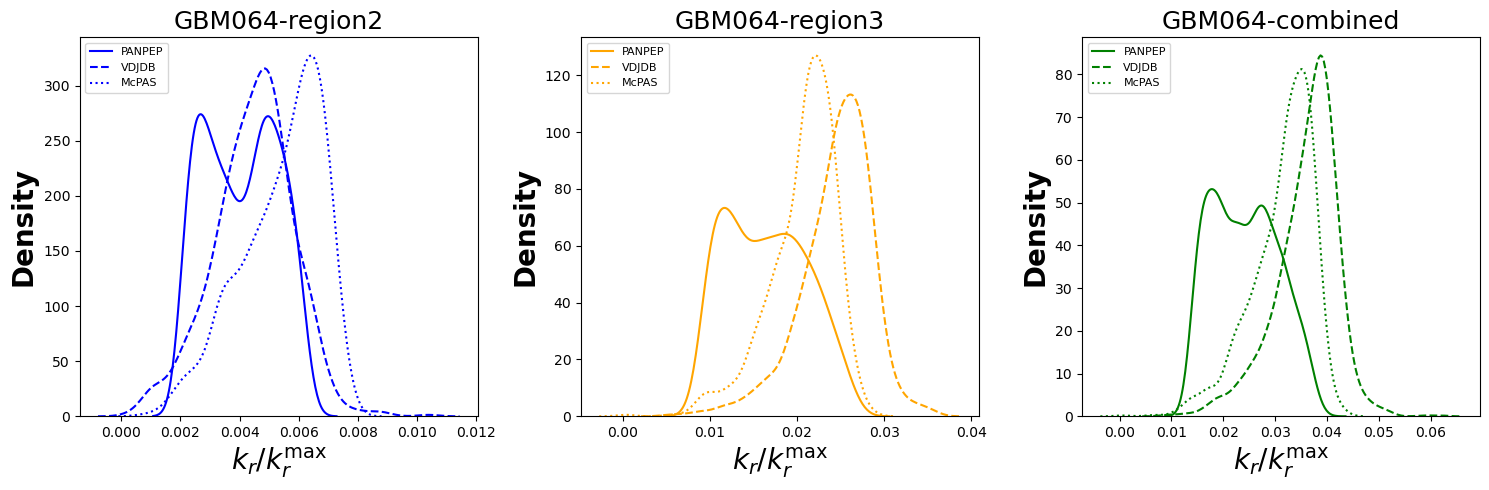

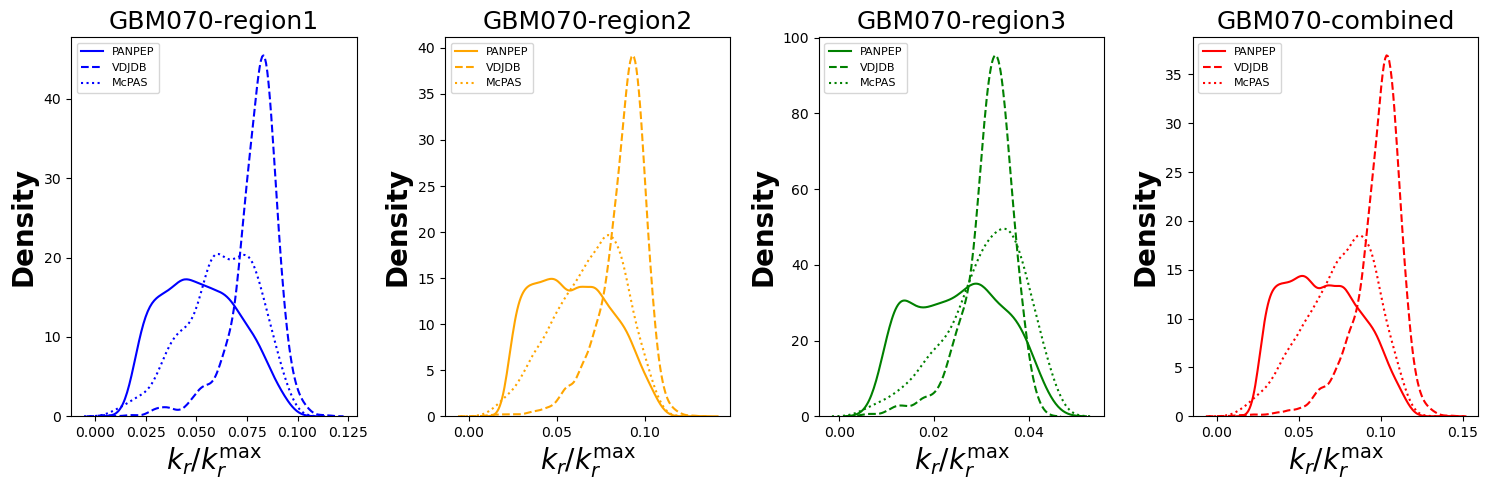

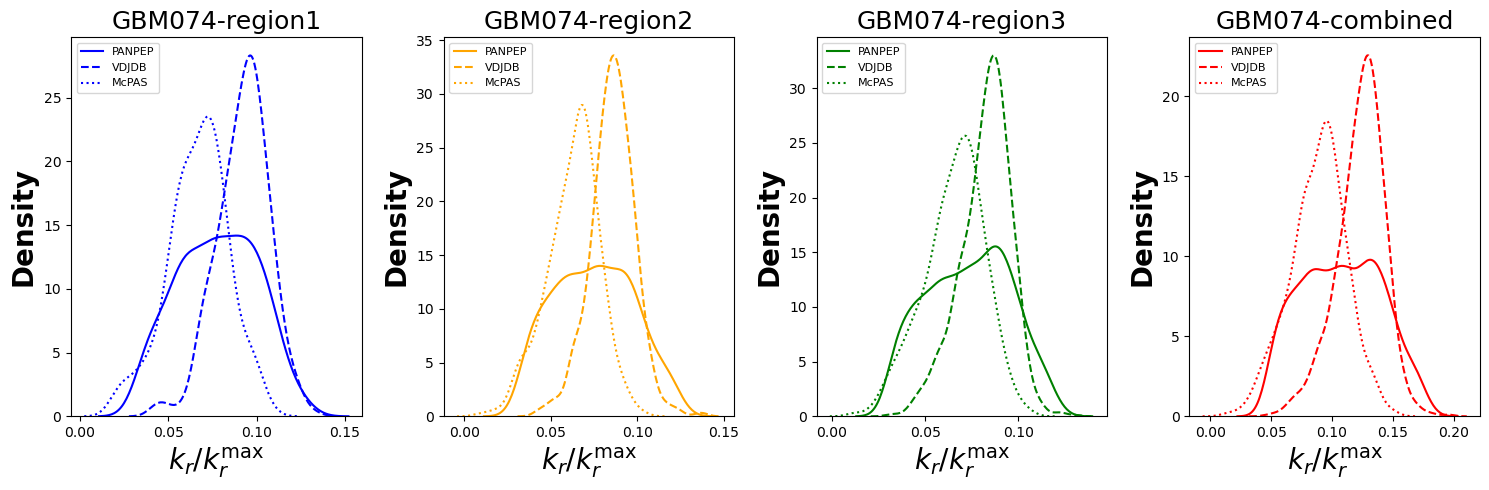

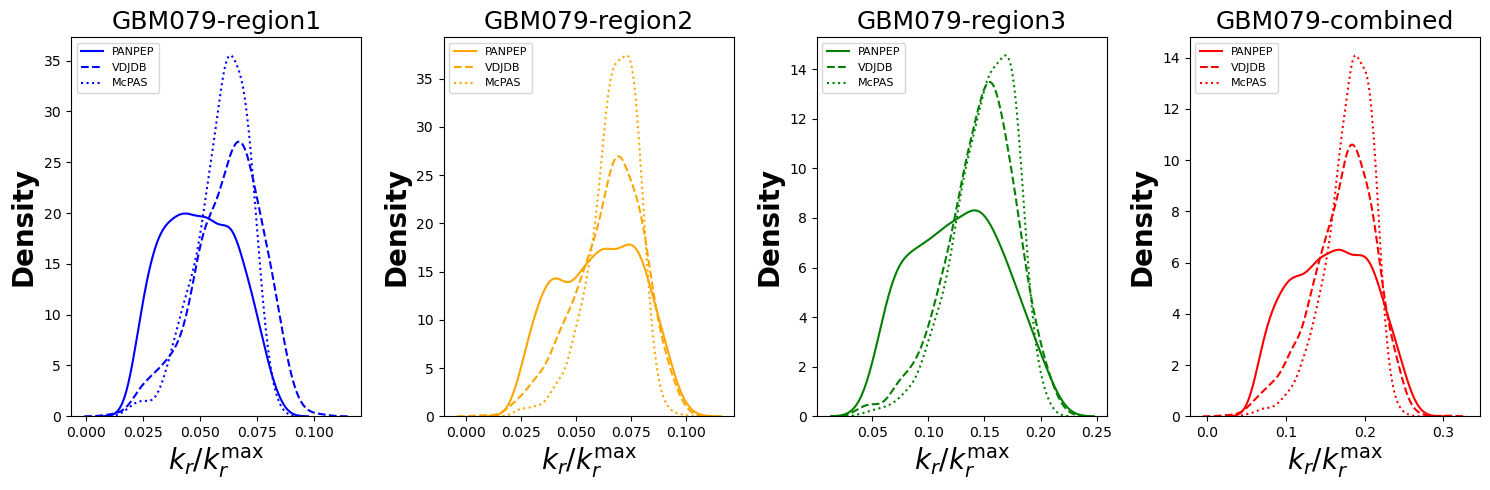

In [3]:
full_data_panpep = pd.read_csv(f'{root_dir}/data/BrMET_and_GBM_data-PANPEP.csv', sep=',')
full_data_ergo = pd.read_csv(f'{root_dir}/data/BrMET_and_GBM_data-ERGO-II.csv', sep=',')
max_kr_panpep = max(full_data_panpep['kr'].values)
max_kr_vdjdb = max(full_data_ergo['kr_vdjdb'].values)
max_kr_mcpas = max(full_data_ergo['kr_mcpas'].values)
patients = np.unique(full_data_panpep['Patient'].values)
for patient_id in patients[:]:
    data_dir_panpep = f"{root_dir}/data/glioblastoma_data/PANPEP/"
    data_dir_ergo = f"{root_dir}/data/glioblastoma_data/ERGOII/"
    filepaths_panpep = os.path.join(data_dir_panpep, patient_id, f"{patient_id}_region*.csv")
    filepaths_ergo = os.path.join(data_dir_ergo, patient_id, f"{patient_id}_region*.csv")
    files_panpep = glob.glob(filepaths_panpep)
    files_ergo = glob.glob(filepaths_ergo)
    sorted_files_panpep = sorted(files_panpep, key=lambda x: int(x.split("region")[1].split(".")[0]))
    sorted_files_ergo = sorted(files_ergo, key=lambda x: int(x.split("region")[1].split(".")[0]))
    region_labels = [f'region{file.split("region")[1].split("_")[0][:-4]}' for file in sorted_files_panpep]
    data_panpep, data_vdjdb, data_mcpas = [], [], []
    colors = ["blue", "orange", "green", "red"]

    for file_panpep, file_ergo in zip(sorted_files_panpep, sorted_files_ergo):
        df_panpep = pd.read_csv(file_panpep, sep=",",)
        kr_values_panpep = df_panpep['kr'].values
        scaled_kr_values_panpep = kr_values_panpep/max_kr_panpep
        data_panpep.append(scaled_kr_values_panpep)
        
        df_ergo = pd.read_csv(file_ergo, sep=",",)
        kr_values_vdjdb = df_ergo['kr_vdjdb'].values
        kr_values_mcpas = df_ergo['kr_mcpas'].values
        scaled_kr_values_vdjdb = kr_values_vdjdb/max_kr_vdjdb
        scaled_kr_values_mcpas = kr_values_mcpas/max_kr_mcpas
        data_vdjdb.append(scaled_kr_values_vdjdb)
        data_mcpas.append(scaled_kr_values_mcpas)
        
    #Add combined data at the end of each list wherever necessary
    all_data_panpep = full_data_panpep[full_data_panpep['Patient']==patient_id]
    data_panpep = data_panpep + [all_data_panpep['kr'].values/max_kr_panpep]
    all_data_ergo = full_data_ergo[full_data_ergo['Patient']==patient_id]
    data_vdjdb = data_vdjdb + [all_data_ergo['kr_vdjdb'].values/max_kr_vdjdb]
    data_mcpas = data_mcpas + [all_data_ergo['kr_mcpas'].values/max_kr_mcpas]
    colors = colors + ["black"]
    titles = region_labels + ['combined']
    
    fig, axes = plt.subplots(
        nrows=1, 
        ncols=len(data_panpep),
        figsize=(15, 5),
    )
    # Convert axes to array if there's only one subplot
    if len(data_panpep) == 1:
        axes = [axes]
    for i, (regional_data_panpep, regional_data_vdjdb, regional_data_mcpas, ax) in enumerate(zip(data_panpep, data_vdjdb, data_mcpas, axes)):
        if len(regional_data_panpep)==0:
            continue
        # mean_val = np.mean(regional_data)
        sns.kdeplot(data=regional_data_panpep, color=colors[i], linestyle='solid', ax=ax, label='PANPEP')
        sns.kdeplot(data=regional_data_vdjdb, color=colors[i], linestyle='dashed', ax=ax, label='VDJDB')
        sns.kdeplot(data=regional_data_mcpas, color=colors[i], linestyle='dotted', ax=ax, label='McPAS')
        # ax.axvline(x=mean_val, color=colors[i], linestyle='--', label=f'Mean: {mean_val:.3f}')
        ax.legend(loc="upper left", fontsize=8)
        ax.set_title(f"{patient_id}-{titles[i]}", fontsize=18)
        ax.set_xlabel(r"$k_r/k^{\text{max}}_r$", fontsize=20, fontweight='bold')
        ax.set_ylabel('Density', fontsize=20, fontweight='bold')
        
        # Enhanced tick parameters
        # ax.tick_params(axis='both', which='major', labelsize=16, length=8, width=3)
        # ax.tick_params(axis='both', which='minor', labelsize=14, length=5, width=2)
        
        # Make axis lines thicker
        # for spine in ax.spines.values():
        #     spine.set_linewidth(3)
        
        # Make tick labels bold by setting font properties
        # for label in ax.get_xticklabels() + ax.get_yticklabels():
        #     label.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

In [5]:
full_data = pd.read_csv(f'{root_dir}/data/BrMET_and_GBM_data-PANPEP.csv', sep=',')
max_kr = max(full_data['kr'].values)
patients = np.unique(full_data['Patient'].values)

all_data = []
for patient_id in patients[:]:
    data_dir = f"{root_dir}/data/glioblastoma_data/"
    filepaths = os.path.join(data_dir, patient_id, f"{patient_id}_region*.csv")
    files = glob.glob(filepaths)
    sorted_files = sorted(files, key=lambda x: int(x.split("region")[1].split(".")[0]))
    region_labels = [f'region{file.split("region")[1].split("_")[0][:-4]}' for file in sorted_files]
    data = []
    colors = ["blue", "orange", "green", "red"]

    for file in sorted_files:
        df = pd.read_csv(file, sep=",",)
        kr_values = df['kr'].values
        scaled_kr_values = kr_values/max_kr
        data.append(scaled_kr_values)
        
    #Add combined data at the end of each list wherever necessary
    combined_data = full_data[full_data['Patient']==patient_id]
    data = data + [combined_data['kr'].values/max_kr]
    colors = colors + ["black"]
    titles = region_labels + ['combined']
    all_data.append(data)

In [6]:
req_data = [all_data[i][-1] for i in range(len(all_data))]

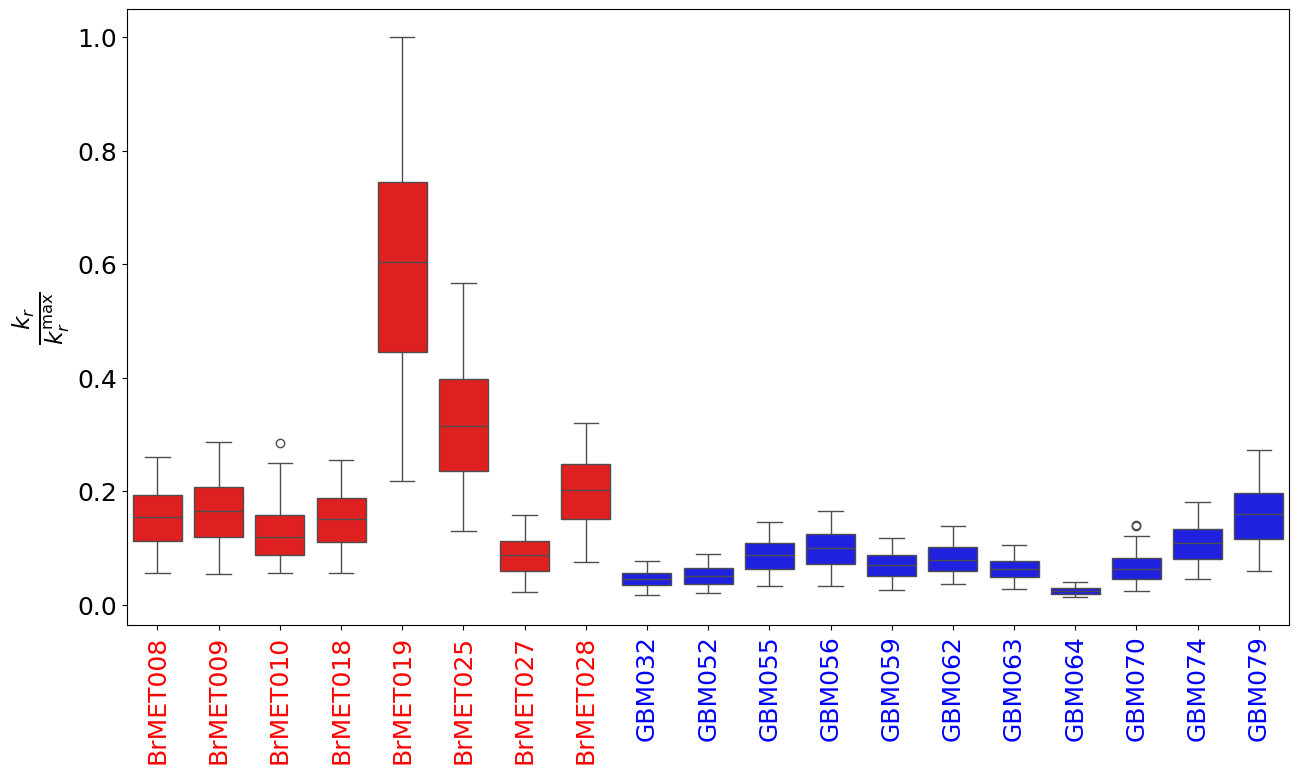

In [7]:
# Create a DataFrame for seaborn
df_list = []
for i in range(len(req_data)):
    df_temp = pd.DataFrame(req_data[i], columns=['Values'])
    df_temp['Array'] = patients[i]
    df_list.append(df_temp)
df = pd.concat(df_list)

# Create a hue variable based on the xticklabels
df['Hue'] = df['Array'].apply(lambda x: 'BrMET' if x.startswith('BrMET') else 'GBM')

# Create a color palette
palette = {'BrMET': 'red', 'GBM': 'blue'}

# Create a seaborn boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x='Array', y='Values', data=df, hue='Hue', palette=palette)

# Set the title and labels
plt.xlabel('', fontsize=24)
plt.ylabel(r'$\frac{k_r}{k^{\text{max}}_r}$', fontsize=24)

# Rotate x-tick labels for better readability
plt.xticks(rotation=90)

ax = plt.gca()
for label in ax.get_xticklabels():
    if label.get_text().startswith('BrMET'):
        label.set_color('red')
    else:
        label.set_color('blue')
    label.set_fontsize(18) # Set fontsize for xticklabels

# Set fontsize for yticklabels
ax.tick_params(axis='y', labelsize=18)

# Remove the legend
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

In [9]:
df

,Values,Array,Hue
0,0.162034,BrMET008,BrMET
1,0.090442,BrMET008,BrMET
2,0.120133,BrMET008,BrMET
3,0.196741,BrMET008,BrMET
4,0.148844,BrMET008,BrMET
...,...,...,...
1679,0.073939,GBM079,GBM
1680,0.064445,GBM079,GBM
1681,0.088476,GBM079,GBM
1682,0.110782,GBM079,GBM


In [10]:
from scipy.stats import ttest_ind

array([0.16203416, 0.09044154, 0.12013344, ..., 0.1749303 , 0.11699806,
       0.09821618], shape=(70122,))

In [17]:
ttest_ind(df[df['Hue']=='BrMET']['Values'].values, df[df['Hue']=='GBM']['Values'].values, equal_var=False)

TtestResult(statistic=np.float64(215.68000184235692), pvalue=np.float64(0.0), df=np.float64(81078.4626445766))

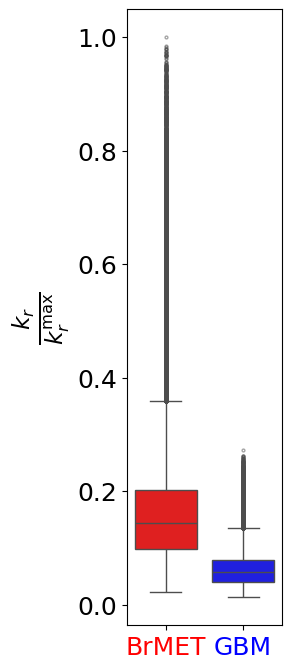

In [8]:
# Create a seaborn boxplot
plt.figure(figsize=(2,8))
sns.boxplot(x='Hue', y='Values', hue='Hue', data=df, palette=palette, flierprops=dict(marker='o', color='gray', markersize=2, alpha=0.5))

# Set the title and labels
plt.xlabel('')
plt.ylabel(r'$\frac{k_r}{k^{\text{max}}_r}$', fontsize=24)

# Set fontsize for yticklabels and xticklabels
ax = plt.gca()
for label in ax.get_xticklabels():
    if label.get_text().startswith('BrMET'):
        label.set_color('red')
    else:
        label.set_color('blue')
    label.set_fontsize(18) # Set fontsize for xticklabels
ax.tick_params(axis='y', labelsize=18)

# Show the plot
plt.show()

In [12]:
req_data = [np.concatenate(all_data[i][:-1]) for i in range(len(all_data))]

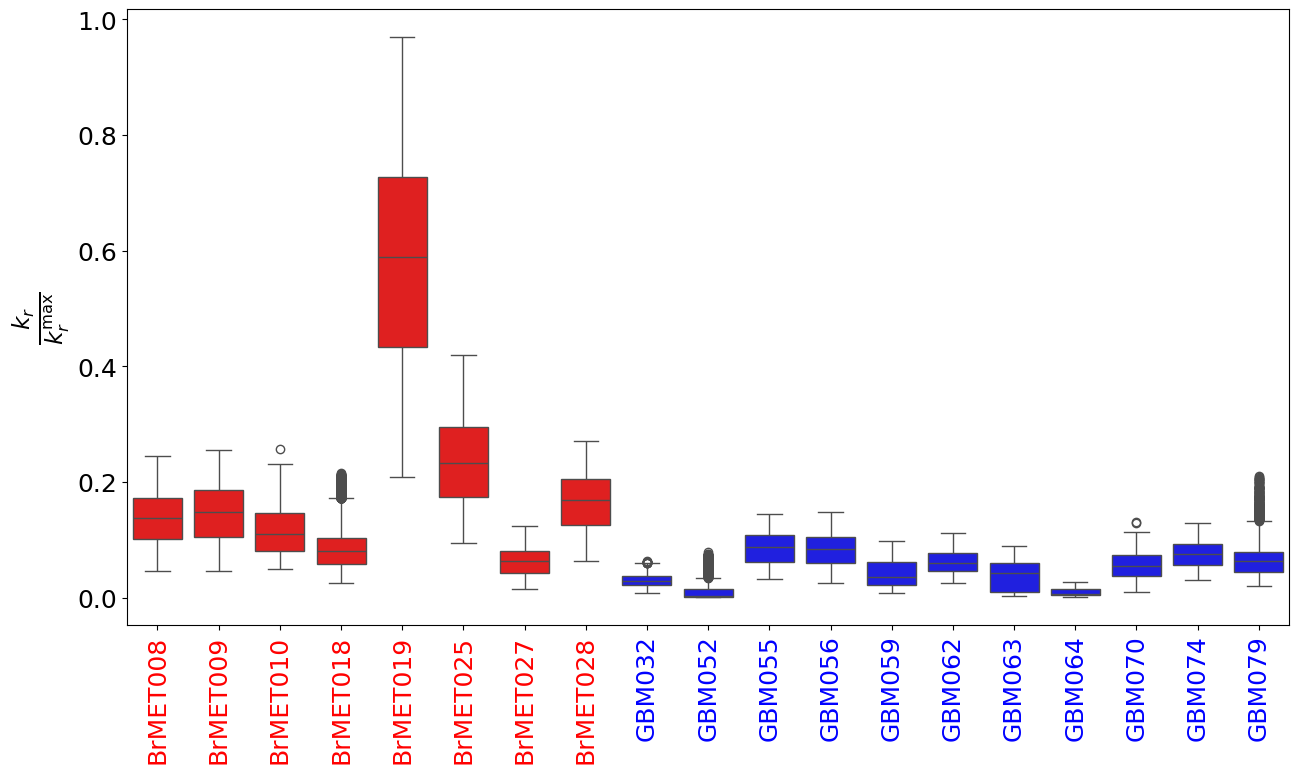

In [14]:
# Create a DataFrame for seaborn
df_list = []
for i in range(len(req_data)):
    df_temp = pd.DataFrame(req_data[i], columns=['Values'])
    df_temp['Array'] = patients[i]
    df_list.append(df_temp)
df = pd.concat(df_list)

# Create a hue variable based on the xticklabels
df['Hue'] = df['Array'].apply(lambda x: 'BrMET' if x.startswith('BrMET') else 'GBM')

# Create a color palette
palette = {'BrMET': 'red', 'GBM': 'blue'}

# Create a seaborn boxplot
plt.figure(figsize=(15,8))
sns.boxplot(x='Array', y='Values', data=df, hue='Hue', palette=palette)

# Set the title and labels
plt.xlabel('', fontsize=24)
plt.ylabel(r'$\frac{k_r}{k^{\text{max}}_r}$', fontsize=24)

# Rotate x-tick labels for better readability
plt.xticks(rotation=90)

ax = plt.gca()
for label in ax.get_xticklabels():
    if label.get_text().startswith('BrMET'):
        label.set_color('red')
    else:
        label.set_color('blue')
    label.set_fontsize(18) # Set fontsize for xticklabels

# Set fontsize for yticklabels
ax.tick_params(axis='y', labelsize=18)

# Remove the legend
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

In [16]:
full_data = pd.read_csv(f'{root_dir}/data/BrMET_and_GBM_data.csv', sep=',')
max_kr = max(full_data['kr'].values)
patients = np.unique(full_data['Patient'].values)
for patient_id in patients:
    patient_data = full_data[full_data['Patient']==patient_id]
    print(f'{patient_id}:{max(patient_data['kr'])}')

BrMET008:58.03853533
BrMET009:64.12782647
BrMET010:63.86816044
BrMET018:56.94082933
BrMET019:223.63591068
BrMET025:126.63839581
BrMET027:35.46873748
BrMET028:71.45062739
GBM032:17.06687428
GBM052:19.87299632
GBM055:32.61049188
GBM056:36.77490807
GBM059:26.41168709
GBM062:31.10976436
GBM063:23.33276553
GBM064:8.76175594
GBM070:31.32993092
GBM074:40.45164549
GBM079:60.8161868
